In [1]:
# Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import joblib

In [3]:
# Load Dataset

df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    0.998273
1    0.001727
Name: Class, dtype: float64


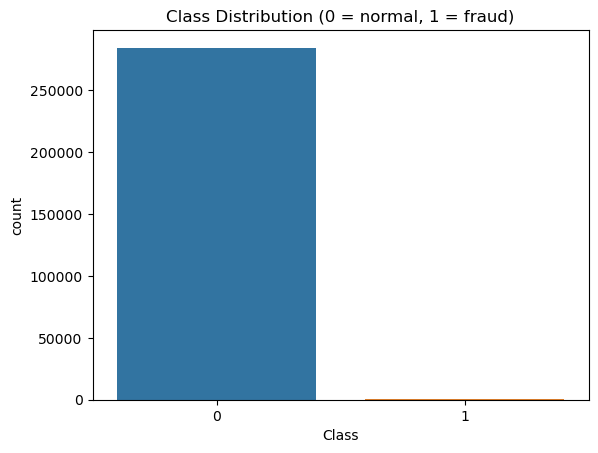

In [4]:
# Analyze Class Distribution

print(df['Class'].value_counts(normalize=True))

sns.countplot(data=df, x='Class')

plt.title("Class Distribution (0 = normal, 1 = fraud)")
plt.show()

In [5]:

# Delete irrelevant Columns

x = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

#Initializing scaler

scaler = StandardScaler()

x['Amount'] = scaler.fit_transform(x['Amount'].values.reshape(-1,1))

In [6]:
# Split dataset 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=12
) 

In [7]:
# Random Forest

model = RandomForestClassifier(
    n_estimators = 100,
    class_weight = 'balanced',
    random_state = 42
)

model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.76      0.83       148

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUC: 0.9445684135979581
Confusion Matrix:
 [[85286     9]
 [   36   112]]


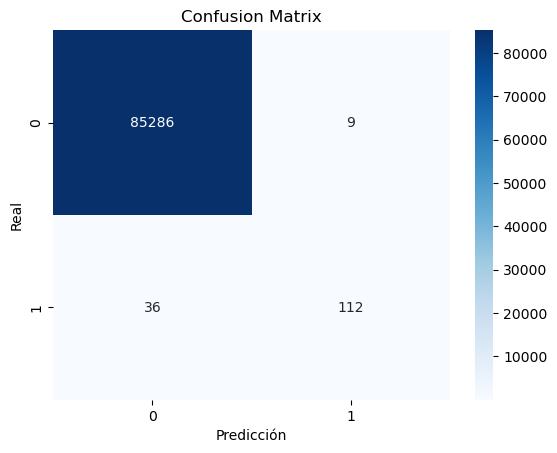

In [8]:
# Hacer predicciones sobre el conjunto de test

y_pred = model.predict(x_test)


y_proba = model.predict_proba(x_test)[:, 1]


print(classification_report(y_test, y_pred))


print("AUC:", roc_auc_score(y_test, y_proba))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [9]:
# Save Model and Scaler

joblib.dump(model, '../src/model.pkl')


joblib.dump(scaler, '../src/scaler.pkl')


['../src/scaler.pkl']